In [92]:
import glob
import pandas as pd

In [93]:
data = []
for path in glob.glob("results_rtree/*/*/*/*.csv"):
    data.extend([pd.read_csv(f"{path}")])

In [94]:
df = pd.concat(data, ignore_index=True)
df = df.drop("Unnamed: 0", axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71700 entries, 0 to 71699
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_x             71700 non-null  float64
 1   start_y             71700 non-null  float64
 2   end_x               71700 non-null  float64
 3   end_y               71700 non-null  float64
 4   euclidian_distance  71700 non-null  float64
 5   max_edge_len        71700 non-null  float64
 6   goal_rate           71700 non-null  float64
 7   sample_options      71700 non-null  int64  
 8   finished            71700 non-null  bool   
 9   iter_count          47857 non-null  float64
 10  final_distance      47857 non-null  float64
dtypes: bool(1), float64(9), int64(1)
memory usage: 5.5 MB


In [95]:
len(data)

717

In [96]:
df.max_edge_len.unique()

array([1.5, 1. , 2. , 2.5, 5. , 4.5, 3. , 0.5, 4. , 3.5])

In [100]:
df.finished.value_counts(normalize=True)

True     0.667462
False    0.332538
Name: finished, dtype: float64

1131


Text(0, 0.5, 'Iterations')

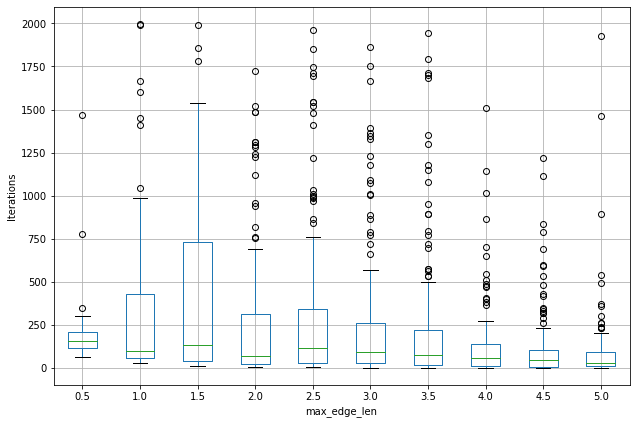

In [158]:
_df = df.dropna()[df.dropna().sample_options==10]
_df = _df[_df.euclidian_distance < 10].dropna()
print(_df["start_x"].count())
a = _df[["iter_count", "max_edge_len"]].boxplot(column=["iter_count"], by="max_edge_len", figsize=(10, 7))
a.get_figure().gca().set_title("");
a.get_figure().suptitle('');
a.get_figure().gca().set_xlabel("max_edge_len")
a.get_figure().gca().set_ylabel("Iterations")


start_x               10000
start_y               10000
end_x                 10000
end_y                 10000
euclidian_distance    10000
max_edge_len          10000
goal_rate             10000
sample_options        10000
finished              10000
iter_count            10000
final_distance        10000
dtype: int64


Text(0, 0.5, 'Iterations')

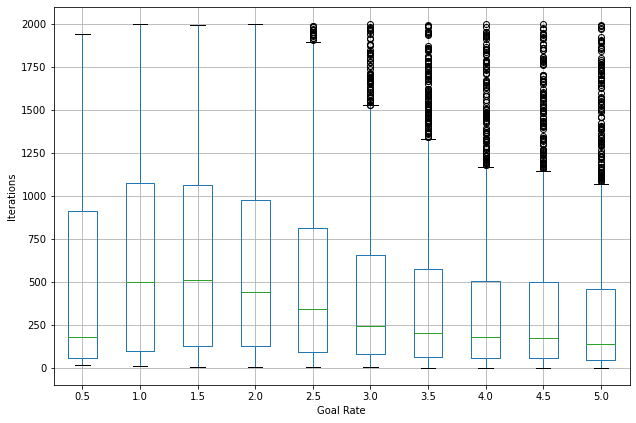

In [130]:
_df = df.dropna()[df.dropna().sample_options==1].sample(10000)
print(_df.count())
a = _df.dropna()[["iter_count", "max_edge_len"]].boxplot(column=["iter_count"], by="max_edge_len", figsize=(10, 7))
a.get_figure().gca().set_title("");
a.get_figure().suptitle('');
a.get_figure().gca().set_xlabel("Goal Rate")
a.get_figure().gca().set_ylabel("Iterations")
